In [9]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


# Read the existing CSV file
existing_df = pd.read_csv('Fertilizer Prediction.csv')

# Upscale the data to reach the desired number of rows
upscaled_df = pd.concat([existing_df] * 14, ignore_index=True)  # Example: Upscale to 5 times the original size

# Concatenate the original and upscaled data
combined_df = pd.concat([existing_df, upscaled_df], ignore_index=True)

# Write the combined data to the same CSV file, overwriting the existing content
combined_df.to_csv('existing_data.csv', index=False)

print("Upscaled data has been written to the existing CSV file.")


Upscaled data has been written to the existing CSV file.


# New Section

In [10]:
df = pd.read_csv("existing_data.csv")

In [11]:

df.shape


(1485, 9)

In [12]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [13]:
from numpy import array
from sklearn.preprocessing import LabelEncoder

In [14]:
soil_type= array(df['Soil Type'].tolist())
crop_type= array(df['Crop Type'].tolist())

In [15]:
crop_type

array(['Maize', 'Sugarcane', 'Cotton', ..., 'Wheat', 'Millets',
       'Sugarcane'], dtype='<U11')

In [16]:
soil_type

array(['Sandy', 'Loamy', 'Black', ..., 'Loamy', 'Sandy', 'Black'],
      dtype='<U6')

In [17]:
label_encoder = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(soil_type)
integer_encoded2 = label_encoder.fit_transform(crop_type)

In [18]:
integer_encoded1

array([4, 2, 0, ..., 2, 4, 0])

In [19]:
dict1={}
for i in range(len(integer_encoded1)):
  dict1[soil_type[i]]=integer_encoded1[i]
dict2={}
for i in range(len(integer_encoded2)):
  dict2[crop_type[i]]=integer_encoded2[i]

In [20]:
dict1

{'Sandy': 4, 'Loamy': 2, 'Black': 0, 'Red': 3, 'Clayey': 1}

In [21]:
dict2

{'Maize': 3,
 'Sugarcane': 8,
 'Cotton': 1,
 'Tobacco': 9,
 'Paddy': 6,
 'Barley': 0,
 'Wheat': 10,
 'Millets': 4,
 'Oil seeds': 5,
 'Pulses': 7,
 'Ground Nuts': 2}

In [22]:
df['Soil Type']=df['Soil Type'].map(dict1)
df['Crop Type']=df['Crop Type'].map(dict2)

In [23]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
1480,25,50,32,1,7,24,0,19,28-28
1481,30,60,27,3,9,4,17,17,10-26-26
1482,38,72,51,2,10,39,0,0,Urea
1483,36,60,43,4,4,15,0,41,DAP


In [24]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type           int64
Crop Type           int64
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [25]:
df.size

13365

In [26]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [27]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [28]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type           int64
Crop Type           int64
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [30]:
df['Fertilizer Name'].value_counts()

Urea        330
DAP         270
28-28       255
14-35-14    210
20-20       210
17-17-17    105
10-26-26    105
Name: Fertilizer Name, dtype: int64

<Axes: >

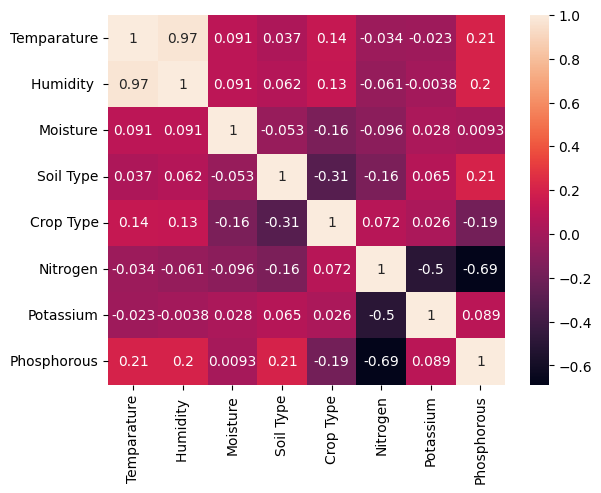

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
features=df
target = features.pop('Fertilizer Name')
label = target

In [33]:
features

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0
...,...,...,...,...,...,...,...,...
1480,25,50,32,1,7,24,0,19
1481,30,60,27,3,9,4,17,17
1482,38,72,51,2,10,39,0,0
1483,36,60,43,4,4,15,0,41


In [34]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [35]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =1)

In [36]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00        27
    14-35-14       1.00      1.00      1.00        41
    17-17-17       1.00      1.00      1.00        22
       20-20       1.00      1.00      1.00        41
       28-28       1.00      1.00      1.00        57
         DAP       1.00      1.00      1.00        38
        Urea       1.00      1.00      1.00        71

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [39]:
score

array([1., 1., 1., 1., 1.])

In [40]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00        27
    14-35-14       1.00      1.00      1.00        41
    17-17-17       1.00      1.00      1.00        22
       20-20       1.00      1.00      1.00        41
       28-28       1.00      1.00      1.00        57
         DAP       1.00      1.00      1.00        38
        Urea       1.00      1.00      1.00        71

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



In [41]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

In [42]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
# acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00        27
    14-35-14       1.00      1.00      1.00        41
    17-17-17       1.00      1.00      1.00        22
       20-20       1.00      1.00      1.00        41
       28-28       1.00      1.00      1.00        57
         DAP       1.00      1.00      1.00        38
        Urea       1.00      1.00      1.00        71

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



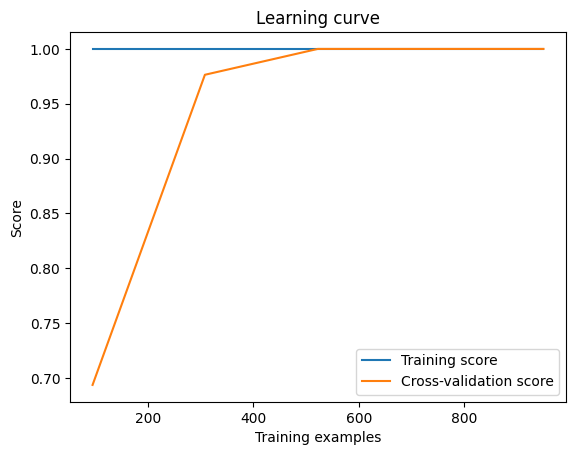

In [43]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVC(gamma='auto'), Xtrain, Ytrain, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend()
plt.show()

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

# Create an SVM pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))

# Train the SVM model
svm_pipeline.fit(Xtrain, Ytrain)

# Accuracy on Test Data
predictions = svm_pipeline.predict(Xtest)
accuracy = accuracy_score(Ytest, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Plot confusion matrix for Test Data
plot_confusion_matrix(svm_pipeline, Xtest, Ytest)
plt.title("Confusion Matrix for Test Data")
plt.show()


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [46]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

In [47]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=42)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00        27
    14-35-14       1.00      1.00      1.00        41
    17-17-17       1.00      1.00      1.00        22
       20-20       1.00      1.00      1.00        41
       28-28       1.00      1.00      1.00        57
         DAP       1.00      1.00      1.00        38
        Urea       1.00      1.00      1.00        71

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



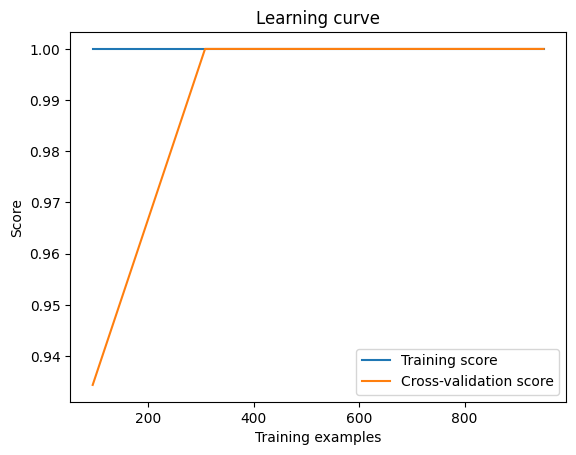

In [48]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(random_state=2), Xtrain, Ytrain, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend()
plt.show()

In [49]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

In [50]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00        27
    14-35-14       1.00      1.00      1.00        41
    17-17-17       1.00      1.00      1.00        22
       20-20       1.00      1.00      1.00        41
       28-28       1.00      1.00      1.00        57
         DAP       1.00      1.00      1.00        38
        Urea       1.00      1.00      1.00        71

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



In [51]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

In [54]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable Ytrain
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Now Ytrain_encoded contains integer labels suitable for classification
import xgboost as xgb

# Initialize XGBoost classifier
XB = xgb.XGBClassifier()

# Train the classifier using the encoded target variable
XB.fit(Xtrain, Ytrain_encoded)

# Make predictions on the test data
predicted_values = XB.predict(Xtest)

# Evaluate the model's performance
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))


XGBoost's Accuracy is:  0.0


ValueError: Mix of label input types (string and number)

In [53]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1471, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got ['10-26-26' '14-35-14' '17-17-17' '20-20' '28-28' 'DAP' 'Urea']


In [ ]:
acc

[0.85, 0.85, 0.75, 0.95, 0.9, 0.9]

ValueError: All arrays must be of the same length

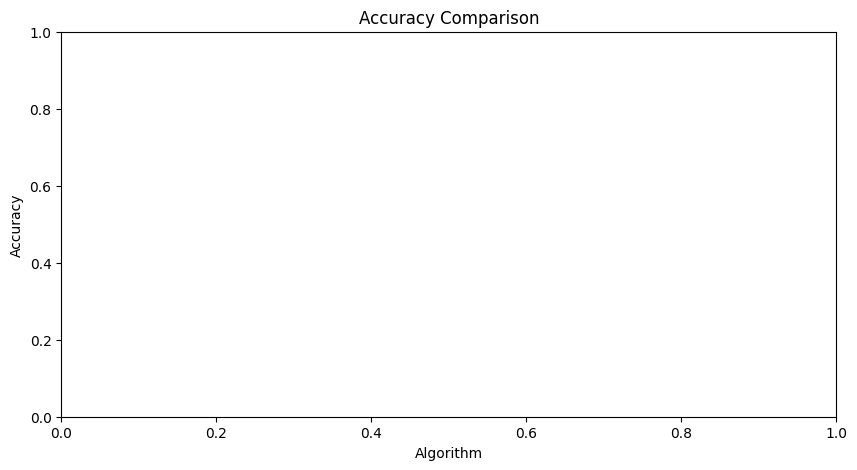

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
sns.barplot(y = acc,x = model,palette='dark')